In [1]:
import numpy as np
import pandas as pd
arrSries  = pd.Series()
fns = ['2HTaSe2_bad_78K097','2HTaSe2_ap_118K002','2HTaSe2_bae_110K012','2HTaSe2_ao_115K037','test']

for fn in fns:
    arrSries[fn] = np.load(f'{fn}_cln.npy')

In [2]:
from useful import *
tab = subtabSr(arrSries)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [3]:
tab

In [4]:
from scipy.fft import fft2, fftshift
from skimage.feature import peak_local_max
def fft2show(arr_cln,vmin,vmax):
  fft_result = fft2(arr_cln)
  fft_result_shifted = fftshift(fft_result)
  magnitude_spectrum = np.abs(fft_result_shifted)
  plt.figure(figsize=(10, 10))
  plt.imshow(magnitude_spectrum, cmap='gray', vmin=vmin, vmax=vmax)
  plt.title('Magnitude Spectrum of 2D FFT')
  return  magnitude_spectrum
def fft2pkfnd(fft2abs,threshold,choose):
  coordinates = peak_local_max(fft2abs, min_distance=100, threshold_abs = threshold)
  plt.scatter(coordinates[:, 1], coordinates[:, 0], s=50, facecolors='none', edgecolors='r')
  for ipeak in range(coordinates.shape[0]):
    plt.text(coordinates[ipeak,1],coordinates[ipeak,0],str(ipeak), color='g')
  coordinates_choose = coordinates[choose,:]
  print(coordinates_choose)
  print(coordinates_choose.shape[0])
  for ipeak in range(coordinates_choose.shape[0]):
    plt.text(coordinates_choose[ipeak,1],coordinates_choose[ipeak,0],str(ipeak), color='b',size= 20)
    pk_all = coordinates - (np.array(fft2abs.shape)/2)
    pk_choose = pk_all[choose,:]
  return pk_choose,pk_all

In [5]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0#0.0000000001 # @param
choose = [0] # @param

In [6]:
from matplotlib import pyplot as plt

In [7]:
chooses = [
    [7,8,11],
    [1,4,3],
    [1,4,7],
    [1,2,5],
    [7,2,5]
]

In [8]:
choose = chooses[0]

In [9]:
ffts = []
for fn,choose in zip(fns,chooses):
    arr_cln = arrSries[fn]
    fft2abs = fft2show(arr_cln,vmin,vmax)
    pk_choose,pk_all = fft2pkfnd(fft2abs,threshold,choose)
    ffts.append(plt.gcf()) 
    plt.close()
        

[[1138 1547]
 [ 494  847]
 [1450  679]]
3
[[274 398]
 [111 208]
 [382 162]]
3
[[559 793]
 [216 417]
 [763 327]]
3
[[543 654]
 [363 464]
 [630 418]]
3
[[1076 1282]
 [ 747  937]
 [1249  854]]
3


In [10]:
subtabs(ffts,fns)

In [11]:
import numpy as np

def autocorr2d_fft(arr):
    f = np.fft.fft2(arr)
    psd = f * np.conj(f)   # power spectral density
    result = np.fft.ifft2(psd).real
    return np.fft.fftshift(result)  # 중앙 정렬

arr = np.random.rand(5, 5)
auto_corr_fft = autocorr2d_fft(arr)

print(auto_corr_fft.shape)

(5, 5)


In [12]:
cntr = np.array(arr.shape)/2

In [13]:
auto_corr_ffts = []
auto_corr_fft_figs= []
for ind in range(len(fns)):
    fn = fns[ind]
    arr = arrSries[fn]
    auto_corr_fft = autocorr2d_fft(arr)
    auto_corr_ffts.append(auto_corr_fft)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(auto_corr_fft, cmap='gray')
    auto_corr_fft_figs.append(fig) 
    tickoff()
    cntr = np.array(arr.shape)/2
    plt.xlim(cntr[1]-50,cntr[1]+50)
    plt.ylim(cntr[0]-50,cntr[0]+50)
    plt.close()
    

In [14]:
subtabs(auto_corr_fft_figs,fns)

In [15]:
from scipy.ndimage import map_coordinates

def line_profile(image, p1, p2):
    """
    Get the line profile of a 2D image between two points p1 and p2.
    
    Args:
        image (np.ndarray): The 2D image.
        p1 (tuple): The (y, x) coordinates of the start point.
        p2 (tuple): The (y, x) coordinates of the end point.
        
    Returns:
        np.ndarray: The 1D array of intensity values along the line.
    """
    y1, x1 = p1
    y2, x2 = p2
    
    # Number of points in the line profile
    num_points = int(np.ceil(np.linalg.norm(np.array(p1) - np.array(p2))))
    
    # Generate coordinates along the line
    y_coords = np.linspace(y1, y2, num_points)
    x_coords = np.linspace(x1, x2, num_points)
    
    # `map_coordinates` expects coordinates in (ndim, n_points) format
    coords = np.vstack((y_coords, x_coords))
    
    # Interpolate the values from the image
    profile = map_coordinates(image, coords, order=1)
    
    return profile

# Example usage:
# Define two points for the line profile
# p1 = (1024, 1024)  # Center of the image




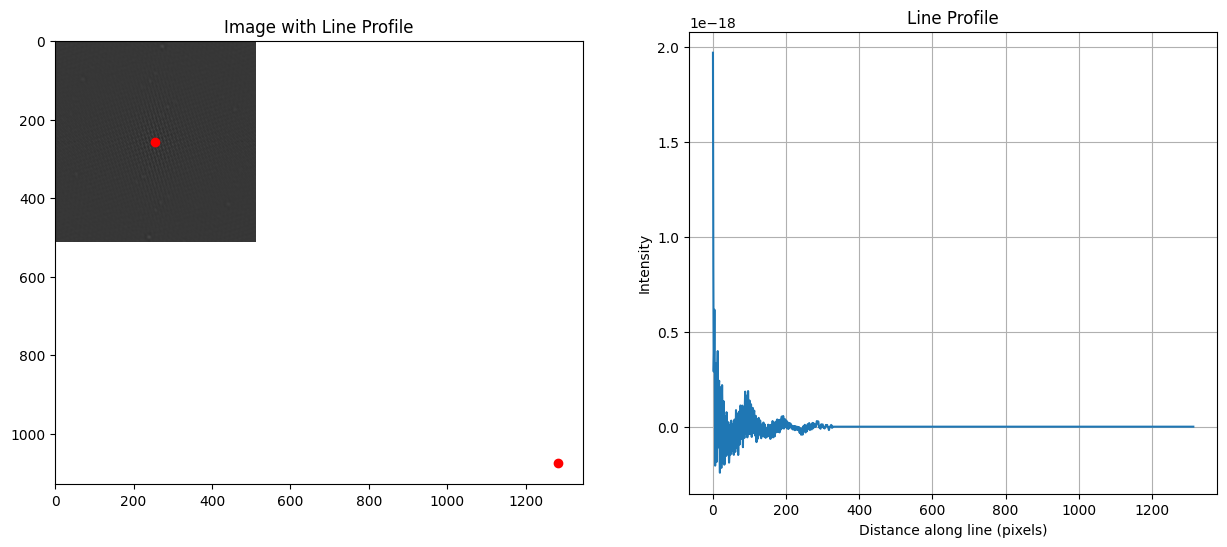

In [16]:
auto_corr_fft = auto_corr_ffts[1]
p1 = np.array(auto_corr_fft.shape)/2
p2 = (1024 + pk_choose[0, 0], 1024 + pk_choose[0, 1]) # A chosen peak
# crp = 400

# Get the line profile from the auto-correlation image
profile = line_profile(auto_corr_fft, p1, p2)

# Plot the result
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the image with the line
axes[0].imshow(auto_corr_fft, cmap='gray')
axes[0].plot([p1[1], p2[1]], [p1[0], p2[0]], 'ro') # Draw line
axes[0].set_title('Image with Line Profile')
axes[0].axis('image')
cntr = p1
# axes[0].set_xlim(cntr[1]-crp,cntr[1]+crp)
# axes[0].set_ylim(cntr[0]-crp,cntr[0]+crp)

# Plot the line profile
axes[1].plot(profile)
axes[1].set_title('Line Profile')
axes[1].set_xlabel('Distance along line (pixels)')
axes[1].set_ylabel('Intensity')
axes[1].grid(True)

plt.show(block=True)

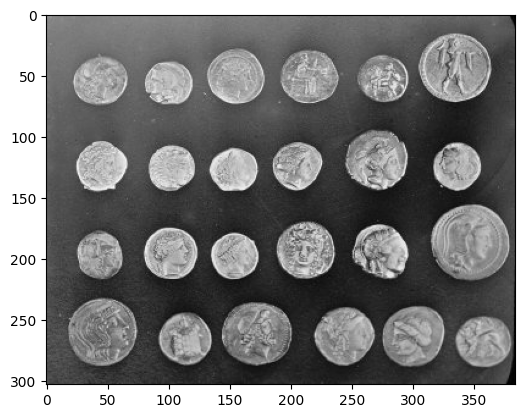

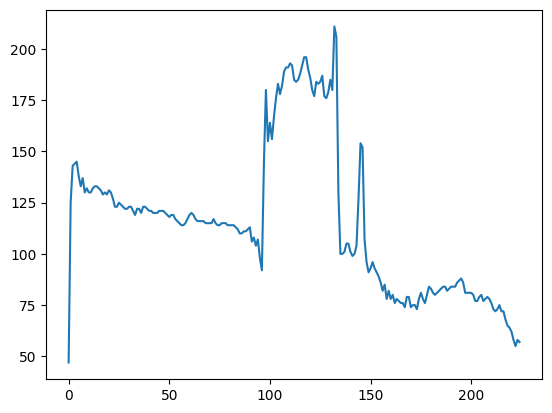

In [17]:
from skimage import data, measure
import matplotlib.pyplot as plt

image = data.coins()
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')

# 두 점 지정
p0, p1 = (0, 0), (100, 200)
profile = measure.profile_line(image, p0, p1)

plt.figure()
plt.plot(profile)
plt.show()


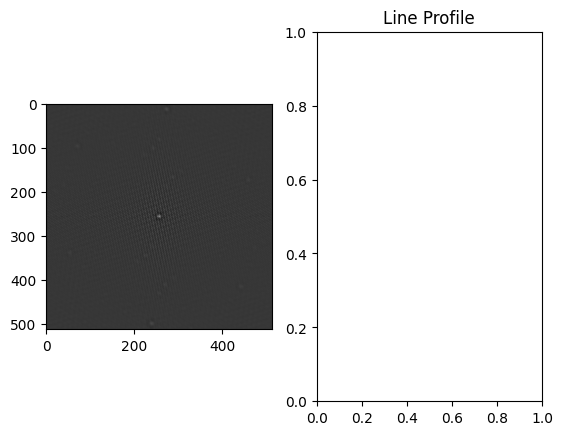

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line

# img = np.random.rand(100, 100)
img = auto_corr_fft
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap='gray')
ax2.set_title("Line Profile")

coords = []

def onclick(event):
    if event.inaxes != ax1:
        return
    coords.append((event.xdata, event.ydata))
    if len(coords) == 2:
        p0, p1 = coords
        profile = profile_line(img, p0, p1, mode='reflect')
        ax2.clear()
        ax2.plot(profile)
        fig.canvas.draw()
        coords.clear()  # 다음 라인을 위해 초기화

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()


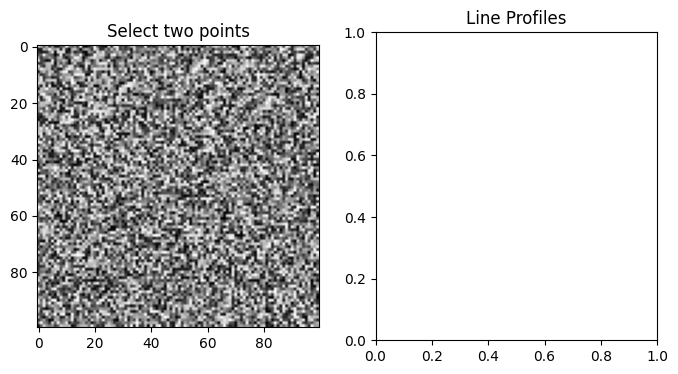

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line

# 예시 이미지
img = np.random.rand(100, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(img, cmap='gray')
ax1.set_title("Select two points")
ax2.set_title("Line Profiles")

coords = []

def onclick(event):
    if event.inaxes != ax1:
        return
    coords.append((event.xdata, event.ydata))

    # 두 점이 선택되면 처리
    if len(coords) == 2:
        p0, p1 = coords

        # 이미지 intensity profile 계산
        profile = profile_line(img, p0, p1, mode='reflect')

        # 오른쪽 그래프에 누적 추가
        ax2.plot(profile, label=f"{p0} → {p1}")
        ax2.legend(fontsize=8)

        # 왼쪽 이미지에 라인 누적 추가
        ax1.plot([p0[0], p1[0]], [p0[1], p1[1]], 
                 color='red', linewidth=2)

        fig.canvas.draw_idle()
        coords.clear()  # 다음 라인을 위해 초기화

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()


In [32]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line

# 예시 이미지
img = np.random.rand(100, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(img, cmap='gray')
ax1.set_title("Select two points")
ax2.set_title("Line Profiles")

coords = []

# 모든 라인 데이터를 저장할 리스트
# 각 항목: {'p0': (x0, y0), 'p1': (x1, y1), 'x': x_coords, 'y': y_coords, 'z': intensity_values}
line_profiles = []

def onclick(event):
    if event.inaxes != ax1:
        return
    coords.append((event.xdata, event.ydata))

    if len(coords) == 2:
        p0, p1 = coords

        # profile_line 함수로 intensity 추출
        z = profile_line(img, p0, p1, mode='reflect')

        # profile_line은 numpy array 인덱스 순서대로 반환
        # x, y 좌표 생성
        num_points = len(z)
        x_coords = np.linspace(p0[0], p1[0], num_points)
        y_coords = np.linspace(p0[1], p1[1], num_points)

        # 저장
        line_profiles.append({
            'p0': p0,
            'p1': p1,
            'x': x_coords,
            'y': y_coords,
            'z': z
        })

        # 오른쪽 그래프에 누적 플롯
        ax2.plot(z, label=f"Line {len(line_profiles)}")
        ax2.legend(fontsize=8)

        # 왼쪽 이미지에 라인 누적 표시
        ax1.plot([p0[0], p1[0]], [p0[1], p1[1]], color='red', linewidth=2)

        fig.canvas.draw_idle()
        coords.clear()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

# 나중에 line_profiles 안의 데이터 사용 가능
for i, profile in enumerate(line_profiles):
    print(f"Line {i+1}: start={profile['p0']}, end={profile['p1']}, num_points={len(profile['z'])}")


In [30]:
type(line_profiles)

list

In [33]:
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)  # 아래쪽에 공간 확보
ax.plot([0, 1, 2], [0, 1, 0])

# TextBox 위치: [left, bottom, width, height] (0~1 figure 좌표)
axbox = plt.axes([0.2, 0.05, 0.6, 0.075])
text_box = TextBox(axbox, "Input: ")

def submit(text):
    print(f"입력된 문자열: {text}")

text_box.on_submit(submit)

plt.show()


입력된 문자열: 1
입력된 문자열: 122
입력된 문자열: 132


In [36]:
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.backend_bases import MouseEvent
from matplotlib.widgets import Cursor


class AnnotatedCursor(Cursor):
    """
    A crosshair cursor like `~matplotlib.widgets.Cursor` with a text showing \
    the current coordinates.

    For the cursor to remain responsive you must keep a reference to it.
    The data of the axis specified as *dataaxis* must be in ascending
    order. Otherwise, the `numpy.searchsorted` call might fail and the text
    disappears. You can satisfy the requirement by sorting the data you plot.
    Usually the data is already sorted (if it was created e.g. using
    `numpy.linspace`), but e.g. scatter plots might cause this problem.
    The cursor sticks to the plotted line.

    Parameters
    ----------
    line : `matplotlib.lines.Line2D`
        The plot line from which the data coordinates are displayed.

    numberformat : `python format string <https://docs.python.org/3/\
    library/string.html#formatstrings>`_, optional, default: "{0:.4g};{1:.4g}"
        The displayed text is created by calling *format()* on this string
        with the two coordinates.

    offset : (float, float) default: (5, 5)
        The offset in display (pixel) coordinates of the text position
        relative to the cross-hair.

    dataaxis : {"x", "y"}, optional, default: "x"
        If "x" is specified, the vertical cursor line sticks to the mouse
        pointer. The horizontal cursor line sticks to *line*
        at that x value. The text shows the data coordinates of *line*
        at the pointed x value. If you specify "y", it works in the opposite
        manner. But: For the "y" value, where the mouse points to, there might
        be multiple matching x values, if the plotted function is not biunique.
        Cursor and text coordinate will always refer to only one x value.
        So if you use the parameter value "y", ensure that your function is
        biunique.

    Other Parameters
    ----------------
    textprops : `matplotlib.text` properties as dictionary
        Specifies the appearance of the rendered text object.

    **cursorargs : `matplotlib.widgets.Cursor` properties
        Arguments passed to the internal `~matplotlib.widgets.Cursor` instance.
        The `matplotlib.axes.Axes` argument is mandatory! The parameter
        *useblit* can be set to *True* in order to achieve faster rendering.

    """

    def __init__(self, line, numberformat="{0:.4g};{1:.4g}", offset=(5, 5),
                 dataaxis='x', textprops=None, **cursorargs):
        if textprops is None:
            textprops = {}
        # The line object, for which the coordinates are displayed
        self.line = line
        # The format string, on which .format() is called for creating the text
        self.numberformat = numberformat
        # Text position offset
        self.offset = np.array(offset)
        # The axis in which the cursor position is looked up
        self.dataaxis = dataaxis

        # First call baseclass constructor.
        # Draws cursor and remembers background for blitting.
        # Saves ax as class attribute.
        super().__init__(**cursorargs)

        # Default value for position of text.
        self.set_position(self.line.get_xdata()[0], self.line.get_ydata()[0])
        # Create invisible animated text
        self.text = self.ax.text(
            self.ax.get_xbound()[0],
            self.ax.get_ybound()[0],
            "0, 0",
            animated=bool(self.useblit),
            visible=False, **textprops)
        # The position at which the cursor was last drawn
        self.lastdrawnplotpoint = None

    def onmove(self, event):
        """
        Overridden draw callback for cursor. Called when moving the mouse.
        """

        # Leave method under the same conditions as in overridden method
        if self.ignore(event):
            self.lastdrawnplotpoint = None
            return
        if not self.canvas.widgetlock.available(self):
            self.lastdrawnplotpoint = None
            return

        # If the mouse left drawable area, we now make the text invisible.
        # Baseclass will redraw complete canvas after, which makes both text
        # and cursor disappear.
        if event.inaxes != self.ax:
            self.lastdrawnplotpoint = None
            self.text.set_visible(False)
            super().onmove(event)
            return

        # Get the coordinates, which should be displayed as text,
        # if the event coordinates are valid.
        plotpoint = None
        if event.xdata is not None and event.ydata is not None:
            # Get plot point related to current x position.
            # These coordinates are displayed in text.
            plotpoint = self.set_position(event.xdata, event.ydata)
            # Modify event, such that the cursor is displayed on the
            # plotted line, not at the mouse pointer,
            # if the returned plot point is valid
            if plotpoint is not None:
                event.xdata = plotpoint[0]
                event.ydata = plotpoint[1]

        # If the plotpoint is given, compare to last drawn plotpoint and
        # return if they are the same.
        # Skip even the call of the base class, because this would restore the
        # background, draw the cursor lines and would leave us the job to
        # re-draw the text.
        if plotpoint is not None and plotpoint == self.lastdrawnplotpoint:
            return

        # Baseclass redraws canvas and cursor. Due to blitting,
        # the added text is removed in this call, because the
        # background is redrawn.
        super().onmove(event)

        # Check if the display of text is still necessary.
        # If not, just return.
        # This behaviour is also cloned from the base class.
        if not self.get_active() or not self.visible:
            return

        # Draw the widget, if event coordinates are valid.
        if plotpoint is not None:
            # Update position and displayed text.
            # Position: Where the event occurred.
            # Text: Determined by set_position() method earlier
            # Position is transformed to pixel coordinates,
            # an offset is added there and this is transformed back.
            temp = [event.xdata, event.ydata]
            temp = self.ax.transData.transform(temp)
            temp = temp + self.offset
            temp = self.ax.transData.inverted().transform(temp)
            self.text.set_position(temp)
            self.text.set_text(self.numberformat.format(*plotpoint))
            self.text.set_visible(self.visible)

            # Tell base class, that we have drawn something.
            # Baseclass needs to know, that it needs to restore a clean
            # background, if the cursor leaves our figure context.
            self.needclear = True

            # Remember the recently drawn cursor position, so events for the
            # same position (mouse moves slightly between two plot points)
            # can be skipped
            self.lastdrawnplotpoint = plotpoint
        # otherwise, make text invisible
        else:
            self.text.set_visible(False)

        # Draw changes. Cannot use _update method of baseclass,
        # because it would first restore the background, which
        # is done already and is not necessary.
        if self.useblit:
            self.ax.draw_artist(self.text)
            self.canvas.blit(self.ax.bbox)
        else:
            # If blitting is deactivated, the overridden _update call made
            # by the base class immediately returned.
            # We still have to draw the changes.
            self.canvas.draw_idle()

    def set_position(self, xpos, ypos):
        """
        Finds the coordinates, which have to be shown in text.

        The behaviour depends on the *dataaxis* attribute. Function looks
        up the matching plot coordinate for the given mouse position.

        Parameters
        ----------
        xpos : float
            The current x position of the cursor in data coordinates.
            Important if *dataaxis* is set to 'x'.
        ypos : float
            The current y position of the cursor in data coordinates.
            Important if *dataaxis* is set to 'y'.

        Returns
        -------
        ret : {2D array-like, None}
            The coordinates which should be displayed.
            *None* is the fallback value.
        """

        # Get plot line data
        xdata = self.line.get_xdata()
        ydata = self.line.get_ydata()

        # The dataaxis attribute decides, in which axis we look up which cursor
        # coordinate.
        if self.dataaxis == 'x':
            pos = xpos
            data = xdata
            lim = self.ax.get_xlim()
        elif self.dataaxis == 'y':
            pos = ypos
            data = ydata
            lim = self.ax.get_ylim()
        else:
            raise ValueError(f"The data axis specifier {self.dataaxis} should "
                             f"be 'x' or 'y'")

        # If position is valid and in valid plot data range.
        if pos is not None and lim[0] <= pos <= lim[-1]:
            # Find closest x value in sorted x vector.
            # This requires the plotted data to be sorted.
            index = np.searchsorted(data, pos)
            # Return none, if this index is out of range.
            if index < 0 or index >= len(data):
                return None
            # Return plot point as tuple.
            return (xdata[index], ydata[index])

        # Return none if there is no good related point for this x position.
        return None

    def clear(self, event):
        """
        Overridden clear callback for cursor, called before drawing the figure.
        """

        # The base class saves the clean background for blitting.
        # Text and cursor are invisible,
        # until the first mouse move event occurs.
        super().clear(event)
        if self.ignore(event):
            return
        self.text.set_visible(False)

    def _update(self):
        """
        Overridden method for either blitting or drawing the widget canvas.

        Passes call to base class if blitting is activated, only.
        In other cases, one draw_idle call is enough, which is placed
        explicitly in this class (see *onmove()*).
        In that case, `~matplotlib.widgets.Cursor` is not supposed to draw
        something using this method.
        """

        if self.useblit:
            super()._update()


fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Cursor Tracking x Position")

x = np.linspace(-5, 5, 1000)
y = x**2

line, = ax.plot(x, y)
ax.set_xlim(-5, 5)
ax.set_ylim(0, 25)

# A minimum call
# Set useblit=True on most backends for enhanced performance
# and pass the ax parameter to the Cursor base class.
# cursor = AnnotatedCursor(line=lin[0], ax=ax, useblit=True)

# A more advanced call. Properties for text and lines are passed.
# Watch the passed color names and the color of cursor line and text, to
# relate the passed options to graphical elements.
# The dataaxis parameter is still the default.
cursor = AnnotatedCursor(
    line=line,
    numberformat="{0:.2f}\n{1:.2f}",
    dataaxis='x', offset=[10, 10],
    textprops={'color': 'blue', 'fontweight': 'bold'},
    ax=ax,
    useblit=True,
    color='red',
    linewidth=2)

# Simulate a mouse move to (-2, 10), needed for online docs
t = ax.transData
MouseEvent(
    "motion_notify_event", ax.figure.canvas, *t.transform((-2, 10))
)._process()

plt.show()

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = ax.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

In [39]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2, color='black', label='1 Hz')
l1, = ax.plot(t, s1, lw=2, color='red', label='2 Hz')
l2, = ax.plot(t, s2, lw=2, color='green', label='3 Hz')

lines_by_label = {l.get_label(): l for l in [l0, l1, l2]}
line_colors = [l.get_color() for l in lines_by_label.values()]

# Make checkbuttons with all plotted lines with correct visibility
rax = ax.inset_axes([0.0, 0.0, 0.12, 0.2])
check = CheckButtons(
    ax=rax,
    labels=lines_by_label.keys(),
    actives=[l.get_visible() for l in lines_by_label.values()],
    label_props={'color': line_colors},
    frame_props={'edgecolor': line_colors},
    check_props={'facecolor': line_colors},
)


def callback(label):
    ln = lines_by_label[label]
    ln.set_visible(not ln.get_visible())
    ln.figure.canvas.draw_idle()

check.on_clicked(callback)

plt.show()

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import MultiCursor

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(3*np.pi*t)
s3 = np.sin(4*np.pi*t)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t, s1)
ax2.plot(t, s2)
fig, ax3 = plt.subplots()
ax3.plot(t, s3)

multi = MultiCursor(None, (ax1, ax2, ax3), color='r', lw=1)
plt.show()

In [55]:
import numpy as np

from matplotlib.path import Path
from matplotlib.widgets import PolygonSelector


class SelectFromCollection:
    """
    Select indices from a matplotlib collection using `PolygonSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : `~matplotlib.axes.Axes`
        Axes to interact with.
    collection : `matplotlib.collections.Collection` subclass
        Collection you want to select from.
    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to *alpha_other*.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.poly = PolygonSelector(ax, self.onselect, draw_bounding_box=True)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    grid_size = 5
    grid_x = np.tile(np.arange(grid_size), grid_size)
    grid_y = np.repeat(np.arange(grid_size), grid_size)
    pts = ax.scatter(grid_x, grid_y)

    selector = SelectFromCollection(ax, pts)

    print("Select points in the figure by enclosing them within a polygon.")
    print("Press the 'esc' key to start a new polygon.")
    print("Try holding the 'shift' key to move all of the vertices.")
    print("Try holding the 'ctrl' key to move a single vertex.")

    plt.show()

    selector.disconnect()

    # After figure is closed print the coordinates of the selected points
    print('\nSelected points:')
    print(selector.xys[selector.ind])

Select points in the figure by enclosing them within a polygon.
Press the 'esc' key to start a new polygon.
Try holding the 'shift' key to move all of the vertices.
Try holding the 'ctrl' key to move a single vertex.

Selected points:
[]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import EllipseSelector, RectangleSelector


def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print(f"({x1:3.2f}, {y1:3.2f}) --> ({x2:3.2f}, {y2:3.2f})")
    print(f"The buttons you used were: {eclick.button} {erelease.button}")


def toggle_selector(event):
    print('Key pressed.')
    if event.key == 't':
        for selector in selectors:
            name = type(selector).__name__
            if selector.active:
                print(f'{name} deactivated.')
                selector.set_active(False)
            else:
                print(f'{name} activated.')
                selector.set_active(True)


fig = plt.figure(layout='constrained')
axs = fig.subplots(2)

N = 100000  # If N is large one can see improvement by using blitting.
x = np.linspace(0, 10, N)

selectors = []
for ax, selector_class in zip(axs, [RectangleSelector, EllipseSelector]):
    ax.plot(x, np.sin(2*np.pi*x))  # plot something
    ax.set_title(f"Click and drag to draw a {selector_class.__name__}.")
    selectors.append(selector_class(
        ax, select_callback,
        useblit=True,
        button=[1, 3],  # disable middle button
        minspanx=5, minspany=5,
        spancoords='pixels',
        interactive=True))
    fig.canvas.mpl_connect('key_press_event', toggle_selector)
axs[0].set_title("Press 't' to toggle the selectors on and off.\n"
                 + axs[0].get_title())
plt.show()

Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pressed.
RectangleSelector deactivated.
EllipseSelector deactivated.
Key pressed.
RectangleSelector activated.
EllipseSelector activated.
Key pr

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import SpanSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2 * np.pi * x) + 0.5 * np.random.randn(len(x))

ax1.plot(x, y)
ax1.set_ylim(-2, 2)
ax1.set_title('Press left mouse button and drag '
              'to select a region in the top graph')

line2, = ax2.plot([], [])


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    region_x = x[indmin:indmax]
    region_y = y[indmin:indmax]

    if len(region_x) >= 2:
        line2.set_data(region_x, region_y)
        ax2.set_xlim(region_x[0], region_x[-1])
        ax2.set_ylim(region_y.min(), region_y.max())
        fig.canvas.draw_idle()


span = SpanSelector(
    ax1,
    onselect,
    "horizontal",
    useblit=True,
    props=dict(alpha=0.5, facecolor="tab:blue"),
    interactive=True,
    drag_from_anywhere=True
)
# Set useblit=True on most backends for enhanced performance.


plt.show()

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import TextBox

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

t = np.arange(-2.0, 2.0, 0.001)
l, = ax.plot(t, np.zeros_like(t), lw=2)


def submit(expression):
    """
    Update the plotted function to the new math *expression*.

    *expression* is a string using "t" as its independent variable, e.g.
    "t ** 3".
    """
    ydata = eval(expression, {'np': np}, {'t': t})
    l.set_ydata(ydata)
    ax.relim()
    ax.autoscale_view()
    plt.draw()


axbox = fig.add_axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, "Evaluate", textalignment="center")
text_box.on_submit(submit)
text_box.set_val("t ** 2")  # Trigger `submit` with the initial string.

plt.show()